In [7]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

In [8]:
# загрузим данные
df = pd.read_csv('data/pokemon.csv')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


## k-means кластеризация

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

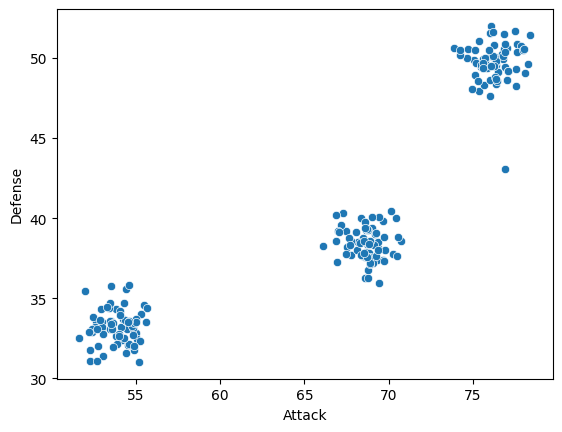

In [9]:
# попробуем кластеризовать покемонов по их силе атаки и защиты
# для этого сохраним в матрицу X 2 интересующих признака: атаку и защиту
X = df[['Attack', 'Defense']]

#визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense)

Теперь инициализируем алгоритм k-means. Для этого зададим:  
    - n_clusters - количество кластеров  
    - init - стратегию кластеризации  
    - n_init - количество запусков алгоритма k-means  
    - random_state - для того, чтобы результаты от запуска к запуску воспроизводились  

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

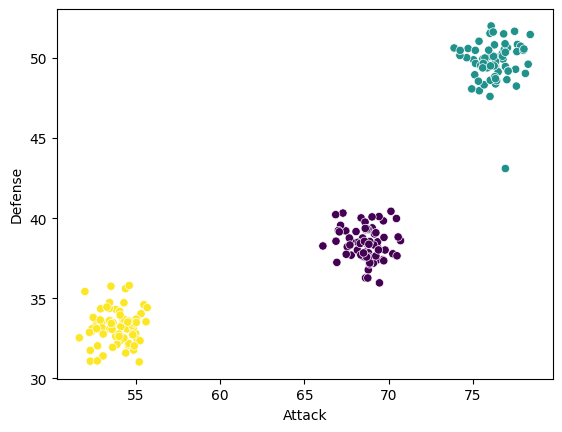

In [11]:
# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

Вроде неплохо, но давайте посмотрим, может если увеличить количество кластеров станет лучше

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

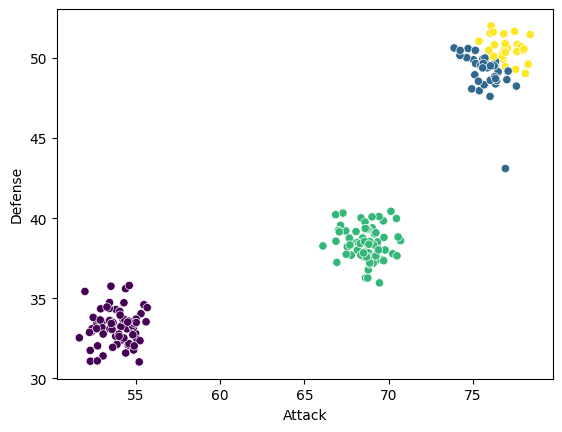

In [12]:
# инициализируем алгоритм k-means, с количеством кластеров 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4)

Вроде неплохо, но явно есть точки, которые находятся вдалеке от основных кластеров. Например, 2 фиолетовые точки 

In [13]:
# добавляем третий признак - скорость покемона, а алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]

# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3_2d'] = predictions

## Выбор количества кластеров с помощью метода локтя

<AxesSubplot: xlabel='cluster', ylabel='inertia'>

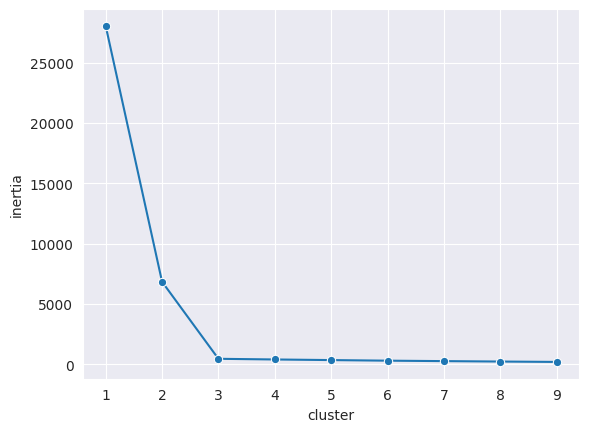

In [14]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов,и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создадим пустой словарь, ключами будут инерция и количество кластеров
res = {"inertia": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

# итерируемся по разным размерам кластеров (от 1 до 9) и сохраним значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    res["inertia"].append(get_inertia(cluster_num, X))
    res["cluster"].append(cluster_num)

# сохраним в датафрейм значение инерции и количество кластеров
res_df = pd.DataFrame(res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=res_df, x="cluster", y="inertia", marker= "o")

Как можно заметить из графика, на сгибе k=3. Значит, оптимальное количество кластеров, подобранное с помощью алгоритма локтя, равняется трём. Значения k от 1 до 2 — недообученная область, а после значения 3 идёт переобучение.

→ Таким образом, метод локтя — это довольно простой метод, основанный на учёте евклидова расстояния между объектами кластера и центроидами.

Однако изгиб на графике также может быть представлен нечётко:
img

Как быть в таком случае? Какое оптимальное количество кластеров выбрать?

Если вдруг в ходе работы вы встречаете график, на котором невозможно найти «локоть», на помощь придёт коэффициент силуэта.

График силуэта, в отличие от графика локтя, имеет пиковый характер, поэтому его проще визуализировать и анализировать.

На графике ниже по оси x отложено количество кластеров, а по оси y — значение коэффициента силуэта. Можно отчётливо увидеть, что пик графика приходится на количество кластеров, равное 3:
img

## Выбор количества кластеров с помощью коэффициент силуэта

Коэффициент силуэта показывает, насколько объект похож на объекты кластера, в котором он находится, по сравнению с объектами из других кластеров.

Силуэт варьируется от -1 до +1: чем выше значение, тем больше объекты похожи на объекты своего кластера и меньше похожи на объекты соседних кластеров.

Если силуэт равен 1, это означает, что кластеры хорошо разделены между собой и имеют высокую плотность внутри себя, например, такая кластеризация, где данные чётко разделены на три группы:
img

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

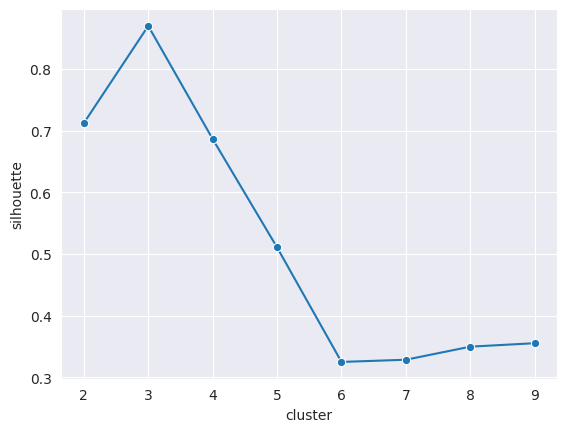

In [15]:
# импортируем метрику силуэт
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

На графике для метода силуэта отчётливо виден пик с наибольшим значением коэффициента силуэта. Значит, оптимальное количество кластеров равно 3.

Если вам нужно найти оптимальное количество кластеров для датасета, наиболее наглядным графиком будет график коэффициента силуэта, поэтому можно сразу воспользоваться им. Но стоит помнить, что для построения данного графика нужно минимум два кластера, так как мы сравниваем объекты одного кластера с другим, наиболее близким кластером.

## Метрики

✍Итак, подбирать оптимальное количество кластеров мы научились. Но как оценить, насколько хорошие кластеры у нас получились?

Допустим, мы разделили кошек и собак на два кластера: в каждом из кластеров находятся либо только кошки, либо только собаки. Но может получиться так, что в ходе кластеризации мы разделим одинаковых собак по разным кластерам или кошки с собаками перемешаются, как на рисунке ниже:



Поэтому было бы хорошо как-то оценивать, не создали ли мы лишние кластеры или одинаковые ли объекты в нашем кластере. В этом нам помогут метрики, которые мы рассмотрим далее.

Чтобы понять, правильно ли объекты распределились по кластерам, необходимо знать, в каких кластерах должны быть объекты.

→ Ранее мы говорили, что кластеризация относится к методу машинного обучения без учителя и применяется, когда нет размеченных данных, а значит мы не знаем правильных ответов. Однако иногда размеченные данные всё же есть. В таком случае мы можем провести дополнительный анализ получившихся кластеров.

Существует ряд метрик, которые можно подсчитать, если данные размечены. Мы рассмотрим четыре метрики, которые больше всего помогут нам при анализе результатов кластеризации:

## 1. Однородность кластеров (homogeneity score)

Данная метрика, как и три последующих, может применяться, только когда есть размеченные данные.

Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру.

Значение метрики уменьшается, если объединить два разных кластера, которые содержат непохожие объекты.
Формула (для любознательных)

Например, нам нужно распределить кошек и собак по разным кластерам. В первом случае нам это удалось, а во втором одна собака «убежала» к кошкам, одна кошка — к собакам, и животные перемешались:

In [16]:
# импортируем подсчет метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию к какому кластеру относятся объекты датасета и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

# теперь посчитаем насколько однородными получились кластеры с покемонами
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0
1.0


Таким образом, во втором случае в кластере оказались разные животные, поэтому однородность снизилась.

→ В первом кластере метрика однородности будет максимальной и равна 1, во втором значение однородности будет меньше, так как животные немного перемешались. Если бы кластер был максимально неоднородный, значение метрики было бы равно 0.

Теперь посмотрим, как рассчитать метрику однородности в sklearn:

In [17]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаем предсказанную информацию к какому кластеру относятся объекты датасета и правильные ответы, подсчитываем метрику
print(completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

# посчитаем насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

# посчитаем насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0
0.829867483307009


Во втором случае мы получаем метрику, равную 1, хотя предсказывали совершенно противоположный результат. Почему так получилось?

Допустим, наши 0 и 1 — это номера кластеров, в которых находятся кошки и собаки:
img

labels_true — это реальные значения: в кластере 0 — собаки, в кластере 1 — кошки. В первый раз мы предсказали, что в кластере 0 находятся две собаки, а в кластере 1 — две кошки. Метрика однородности равна 1, так как внутри кластеров разные объекты и наши ответы полностью совпали с labels_true.

Во втором случае, казалось бы, будет неверно, если в кластере 0 будут кошки, а в кластере 1 — собаки. Но, судя по составу кластеров, кошки и собаки не перемешались, поэтому однородность кластеров будет равна 1.

Рассмотрим метрику однородности на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и четырьмя кластерами:

Вы можете удивиться, что во втором случае метрика равна 1, но это нормально: хоть мы и разделили данные на большее количество кластеров, внутри кластеров данные остались однородными.
2
	

## 2. Полнота кластера (completeness score)

Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, при кластеризации оказались в одном кластере.

Значение метрики уменьшается, если эталонный кластер разделить на части. Например, если кластер, в котором находятся только собаки, разделить на два более мелких кластера, то метрика полноты у такой кластеризации будет меньше:
img

При максимальном заполнении кластеров схожими объектами полнота равняется 1 (когда есть один большой кластер со всеми собаками), при минимальном заполнении — 0.

Рассмотрим метрику полноты на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и четырьмя кластерами:

Во втором случае третий кластер оказался неполным, так как предсказано, что половина объектов принадлежит к третьему кластеру, а другая половина — к четвёртому. Однако два других кластера предсказаны правильно, поэтому метрика полноты меньше 1, но всё же её значение не такое низкое.

## 3. V-мера (V-Measure)

Эта метрика — комбинация метрик полноты и однородности.

Значение V-меры варьируется от 0 до 1. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.

V-мера рассчитывается по формуле:

По умолчанию , но это значение можно варьировать, если хочется дать разный вес разным свойствам.

        Если однородность кластеров важнее, чем их полнота, следует указать значение . Тогда значение 

в знаменателе получится небольшим и тем самым будет сильнее влиять на значение . Чем меньше

        , тем выше .
        Если однородность кластеров не особо важна, но важно, чтобы каждый кластер содержал максимальное количество похожих объектов, тогда мы регулируем значение так, чтобы .

Данную метрику можно сравнить с метрикой F-меры, которую вы изучили, когда проходили метрики для оценки моделей классификации. F-мера рассчитывается следующим образом:

где 
показывает точность, а

 — полноту.

При стандартном расчёте V-меры равна 1:

Получается такая же формула, как и при расчёте F-меры.

→ Метрику однородности кластера при кластеризации можно сравнить с метрикой precision из задачи классификации: метрика однородности также показывает, насколько точно мы предсказали, к какому классу принадлежит объект. Метрика полноты так же, как метрика recall из задачи классификации, показывает, насколько мы наполнили кластеры теми объектами, которые должны принадлежать к данным кластерам.

Данную метрику можно вычислять, когда одновременно важны и наполненность кластеров, и их однородность.

Допустим, мы разделили данные следующим образом:
img

Если бы мы считали метрику однородности кластеров, то она была бы равна 1, так как кластеры однородны и собаки и кошки внутри них не перемешаны. Но очевидно, что кластеризация неидеальна: вместо одного кластера с собаками у нас целых два. Поэтому если бы мы неправильно выбрали метрику (считали бы однородность) для определения качества кластеризации, то сделали бы неверные выводы. Но если мы будем считать V-меру, то будем одновременно учитывать оба фактора (полноту и однородность кластеров). Если же какой-то из факторов для нас важнее, мы можем изменять значение , придавая больший вес однородности кластера или полноте.

Посчитаем V-меру для двух случаев кластеризации датасета с покемонами:
img

In [18]:
# импортируем из библиотеки sklearn подсчет v-меры
from sklearn.metrics import v_measure_score


# теперь посчитаем v-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9070246789753754


## 4. Индекс Рэнда

Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (number of agreeing pairs), среди предсказанных и размеченных данных.

где
— общее количество пар, 

— количество пар, для которых предсказание и истинные значения совпали.

По сути, данная метрика подсчитывает, для какой доли объектов датасета мы правильно определили кластер.
img

Вернёмся к нашим кошкам и собакам. Слева на рисунке выше — предсказанная кластеризация, справа — «правильные ответы».

Теперь для каждого объекта найдём пару предсказанное значение-реальное значение. 

number of agreeing pairs = 5, т. е. для трёх собак и двух кошек кластеры были предсказаны верно, а для двух пар (они соединены красной линией) — неверно.

number of pairs = 7

Таким образом,

.

Запустим подсчёт индекса Рэнда в sklearn:

In [19]:
# импортируем из библиотеки sklearn подсчет индекса Рэнда
from sklearn.metrics.cluster import rand_score

# теперь посчитаем насколько полными получились кластеры с покемонами
print(rand_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(rand_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.94643618280843


## Юнит 2. Другие методы кластеризации

In [20]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering


# запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)

# обучаем модель
agglomerative_clustering.fit(X)

# получаем метки c информацией, к какому кластеру относятся объекты
agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1])

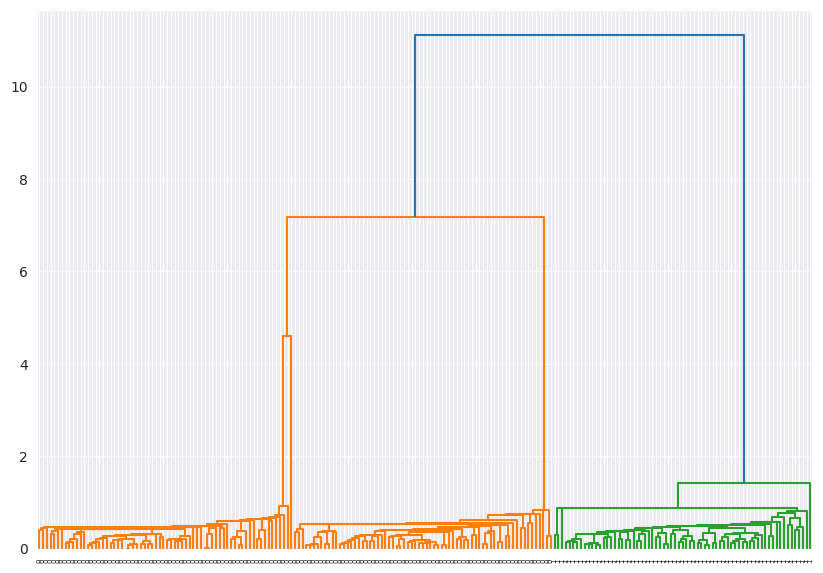

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')


plt.figure(figsize=(10, 7))

dendrogram(linked,
            orientation='top',
            labels=agglomerative_clustering.labels_,
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

## EM кластеризация 

Запустим алгоритм на датасете покемонов и попробуем кластеризовать их по силе атаки и уровню защиты:

In [22]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

Основные параметры, которые необходимо задать для запуска алгоритма GaussianMixture:

        n_components — количество кластеров.
        random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

Параметров при запуске может быть больше, при желании можно почитать о них в документации sklearn:

Преимущества и недостатки EM-кластеризации

Img

        Кластеры, которые находит этот алгоритм, могут принимать форму эллипса, а не ограничиваться окружностями. K-Means является частным случаем GMM.

        img

        Если объект находится в середине двух перекрывающихся кластеров, то, в отличие от k-means, не нужно решать, к какому кластеру он принадлежит: объект может принадлежать к двум разным кластерам с разной вероятностью.

        img

Img

        Нужно задавать количество кластеров.
        Чувствителен к тому, с какой точки начинается алгоритм.
        Может медленно сходиться, т. е. искать, как оптимально описать кластеры.



## GMM кластеризация

In [ ]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture


gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

/Users/aigul/miniconda3/envs/clustering-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

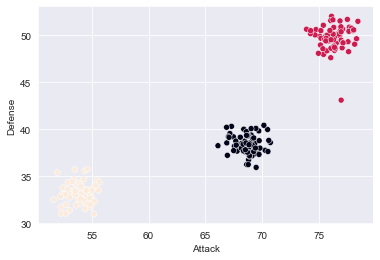

In [ ]:
# sns.set_style("white")
sns.scatterplot(df.Attack, df.Defense, c=gm_prediction)

## Спектральная кластеризация

Данный тип кластеризации использует собственные значения (спектр) матрицы сходства данных, чтобы снизить размерность данных и далее провести кластеризацию.

Более подробно со спектром вы познакомитесь, когда будете изучать линейную алгебру.

Алгоритм спектральной кластеризации состоит из четырёх шагов:

    На первом шаге мы создаём граф, количество вершин которого равняется количеству объектов в датасете.

    Рёбра графа, соединяющие две вершины, будут содержать информацию о схожести двух объектов, находящихся в вершине.

    Информацию о схожести вершин записываем в матрицу, строки и столбцы которой — это вершины, а в ячейку записана схожесть двух вершин:

    После этого проводим некоторые математические преобразования этой матрицы. Это нужно для того, чтобы далее мы могли описать вершину графа не шестью признаками, а всего одним:

    Далее уменьшаем размерность данных.

    Сейчас одна вершина описывается шестью признаками, а значит, если проводить кластеризацию этих данных, кластеризация будет в шестимерном пространстве. С помощью подходов понижения размерности мы можем уменьшить количество признаков, описывающих вершину. На данный момент вникать в суть преобразований нам не нужно (в одном из следующих юнитов этого модуля мы разберём эту задачу более подробно) — сейчас важно понять саму идею преобразования, а также то, что до понижения размерности мы описывали одну вершину графа шестью признаками, а после преобразования стали описывать её одним признаком:

    Теперь одна вершина описывается одним признаком.
        
    Далее проводим кластеризацию матрицы с уменьшенной размерностью.

    Основываясь на значениях признаков v2, мы можем определить вершины 1, 2 и 3 в один кластер, а вершины 4, 5, 6 — в другой. То, что разные вершины стали принадлежать к разным кластерам, можно визуализировать следующим образом:



    Таким образом, мы «разрезаем» исходный граф на два более маленьких графа. Каждый подграф — это отдельный кластер. Мы разрезаем граф так, чтобы похожие вершины оказываются в одном подграфе, а непохожие — в другом.

    В самом начале мы не могли так разрезать граф, так как было непонятно, как разделить его так, чтобы похожие вершины оказались в одном кластере. Применив математические преобразования, мы смогли это сделать и таким образом кластеризовали наши данные.

## Для каких задач используется спектральная кластеризация?

Данный метод широко используется для сегментации изображений. В данном случае вершины графа — это пиксели изображения.

Например, если у нас есть зашумлённая картинка (ниже слева), на которой нужно сегментировать изображение и выделить разные кластеры, то спектральная кластеризация отлично подойдёт для такой задачи. Результаты сегментации можно наблюдать на картинке справа:

In [25]:
df

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters,Clusters_k3,Clusters_k4,Clusters_k3_2d
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2,1,3,0
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1,0,2,2
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2,1,1,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2,1,3,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
201,Skiddo,350,66,75.932190,50.498392,62,57,52,2,1,3,2
202,Gogoat,531,123,76.919520,50.361511,97,81,68,2,1,3,2
203,Clauncher,330,50,76.038055,49.515184,58,63,44,2,1,1,0
204,Clawitzer,500,71,66.854449,40.217467,120,89,59,1,0,2,2


In [31]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию 
spectral_clustering = SpectralClustering(n_clusters=4, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

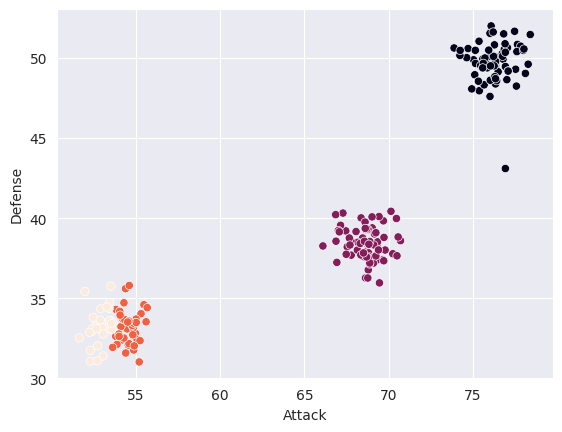

In [32]:
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions)

## Преимущества и недостатки спектральной кластеризации


        Подходит для кластеризации данных с большим количеством признаков, так как использует технику понижения размерности.
        Эффективна для кластеризации разрежённых данных.
        Хорошо работает на практически любых распределениях данных. На рисунке ниже представлены результаты кластеризации данных с разным распределением признаков:

        Кликните на изображение, чтобы просмотреть его в полном размере ↓

        Источник изображения

        Алгоритм показал хорошие результаты во всех случаях, за исключением данных в форме вытянутого эллипса (столбец 3).

Img

        Нужно заранее задавать количество кластеров.
        Подходит для задач сбалансированной классификации, то есть количество точек между кластерами не сильно отличается.



## DBSCAN

При кластеризации на основе плотности нам не нужно задавать количество кластеров — алгоритм сам определяет оптимальное число. Такой алгоритм кластеризации отлично справляется с выбросами и с данными произвольной формы.

Наиболее популярный алгоритм кластеризации на основе плотности — DBSCAN. Далее мы рассмотрим его подробнее.

DBSCAN (Density-based spatial clustering of applications with noise)

Данный алгоритм применим, если:

        перед вами стоит задача с данными сложной формы, например выделение районов на карте:



        в данных большое количество выбросов, например данные медицинских анализов пациентов.

В таких случаях ранее изученный алгоритм k-means не поможет. Зато на помощь придёт DBSCAN.

Преимущества алгоритма DBSCAN:

        В отличие от k-means, не нужно задавать количество кластеров — алгоритм сам определит оптимальное.
        Алгоритм хорошо работает с данными произвольной формы.
        DBSCAN отлично справляется с выбросами в датасетах.

Посмотрим на рисунок, где показано, как два разных алгоритма отрабатывают на разных данных. Первая строчка — это алгоритм DBSCAN, вторая — k-means. Данные имеют разное распределение: например, данные в первом столбце распределены в виде двух окружностей (синей и оранжевой), данные в четвёртом столбце — в виде трёх отдельных кластеров.
img



Как видим, алгоритм DBSCAN хорошо справился с первыми двумя способами кластеризации, а в третьем случае результаты работы обоих алгоритмов несколько спорные. Если датасеты хорошо разделены, как в четвёртом случае, оба алгоритма справляются хорошо. Если данные образуют один участок с одинаковой плотностью данных, DBSCAN не может разделить такие данные.

Давайте подробнее посмотрим, как работает DBSCAN. Допустим, у нас есть признаки
(значения роста и веса людей). Если визуализировать эти данные, становится понятно, что их можно разделить на два кластера, а также наблюдаются выбросы (серые точки):

### Для каких задач используется DBSCAN?

Данный алгоритм довольно популярный — областей его применения много.

        Можно использовать DBSCAN для разработки системы рекомендаций в магазине. Если мы точно не знаем, на какие группы можно разделить пользователей, то на основе того, что покупают люди, можно провести DBSCAN-кластеризацию.

        Например, два покупателя оказались в одном кластере: один купил печенье, книгу и плед, а второй — только книгу и плед. На основе этой информации мы можем порекомендовать второму покупателю купить ещё и печенье.

        Данный алгоритм успешно справляется с поиском выбросов в данных. Рассмотренные ранее алгоритмы кластеризации, в отличие от DBSCAN, не выделяют выбросы в отдельные объекты.

        Это свойство алгоритма можно использовать для поиска отклонений медицинских показателей пациентов или для анализа финансового мошенничества.

        Часто DBSCAN применяют для кластеризации геоданных, так как он может выделять данные сложной формы.

        Например, на основе статистики заказов такси в пятничный вечер с помощью кластеризации можно выделить районы города, куда можно поехать отдыхать в преддверии выходных. Ваши коллеги из отдела Data Science в компании «Ситимобил» провели такой анализ для Петербурга и получили следующие результаты:

Запуск алгоритма довольно простой и похож на запуск k-means. Вновь обратимся к нашему датасету с покемонами.

Основные параметры для запуска DBSCAN:

        eps — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Это один из важнейших параметров в алгоритме DBSCAN. Попробуйте изменять его и посмотрите, как будут меняться кластеры в зависимости от значения параметра. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.
        min_samples — задаёт необходимое количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.


In [ ]:
df

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters,Clusters_k3,Clusters_k4,Clusters_k3_2d
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2,1,3,0
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1,0,2,2
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2,1,1,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2,1,3,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
201,Skiddo,350,66,75.932190,50.498392,62,57,52,2,1,3,2
202,Gogoat,531,123,76.919520,50.361511,97,81,68,2,1,3,2
203,Clauncher,330,50,76.038055,49.515184,58,63,44,2,1,1,0
204,Clawitzer,500,71,66.854449,40.217467,120,89,59,1,0,2,2


/Users/aigul/miniconda3/envs/clustering-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

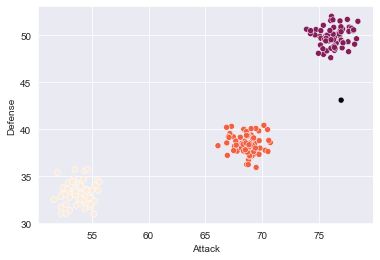

In [ ]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(df.Attack, df.Defense, c=clustering.labels_)

В данном случае мы не задавали количество кластеров, алгоритм смог сам разделить данные. Также DBSCAN смог выделить выброс в данных.

Преимущества и недостатки DBSCAN

Img

        Не нужно задавать количество кластеров.
        Устойчив к шуму и выбросам, может находить выбросы в данных.
        Способен найти кластеры любой геометрической формы.

Img

        Не может качественно кластеризовать наборы данных с большой разницей в плотности.
        Равноудалённые от двух кластеров объекты могут быть отнесены к тому кластеру, с которого алгоритм начал работать, что не всегда оказывается верным.
        Бывает сложно подобрать eps.





# 8. Визуализация результатов кластеризации

✍ До этого мы не только строили кластеры, но и наблюдали, как выглядят наши данные после кластеризации. Визуализация позволяет лучше понять данные и полученные результаты. В этом юните мы рассмотрим, как лучше визуализировать результаты кластеризации, и в этом вам помогут знания, полученные в модуле PY-13.

В зависимости от количества признаков, описывающих объект, можно выделить две разновидности визуализации: 2D и 3D.

Если объект описывается двумя признаками, например рост и вес, эти значения легко распределить по осям X и Y. Если прибавляется ещё один признак, понадобится дополнительная ось Z, и график будет трёхмерным. В зависимости от алгоритма кластеризации мы можем просто визуализировать кластеры или же нарисовать дендрограмму.

В данном юните мы рассмотрим следующие способы визуализации:

        диаграмма рассеяния для двухмерного и трёхмерного случаев;
        Convex Hull, или выпуклая оболочка;
        дендрограмма;
        Clustergram.

